<a href="https://colab.research.google.com/github/pacorod1998/Uber-Case-Study/blob/main/Uber_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uber Case Study**

DailyUber provides the 2016 data. By using this data find out the demand and supply Analysis gap of the cab. The main objective of this project is to analyse the data on Uber Request data. Through the analysis of data, we can find some important insights.



*  App Openings (Eyeballs) = Customers who launch the app looking for riders. It is a good measure of demand
*   Zeroes = Customers who open the app and see no cars in the area.
*   Request = Customers who make requests for a car.
*   Completed Trip = The point from when a customer is picked


###**Objectives for Analysis**



1.   Which date had the most completed trips during the two weeks?
2.   What was the highest number of completed trips within a 24-hour period?
3.   Which hour of the day had the most requests during the two-week period?
4.   What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)?
5.   What is the weighted average ratio of completed trips per driver during the two week period?
6.   In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.
7.   True or False: Driver supply always increases when demand increases during the two week period.
8.   If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?
9.  True or False: There is exactly two weeks of data in this analysis
10.  Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)













###**Mounting Google Drive**

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os

path = "/content/gdrive/MyDrive/BANA6350/Data"

os.chdir(path)

In [ ]:
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('Uberdataset.csv').head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


###**Importing Commonly used python packages and Setting up formatting:**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available
plt.style.use('fivethirtyeight')

###**Loading Dataset**

In [ ]:
df = pd.read_csv('Uberdataset.csv')

In [ ]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


###**Basic Understanding of Data**

In [ ]:
df.shape # there are 336 rows and 7 columns in the dataset

(336, 7)

In [ ]:
# name and datatype of each column
df.info() # date column type is object need to conver to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (Local),336.0,11.500000,6.932510,0.0,5.75,11.5,17.25,23.0
Eyeballs,336.0,19.901786,16.902862,0.0,9.00,17.0,25.00,99.0
Zeroes,336.0,4.252976,5.795391,0.0,1.00,3.0,5.00,59.0
Completed Trips,336.0,4.062500,5.672581,0.0,0.00,2.0,5.00,36.0
Requests,336.0,5.529762,7.399416,0.0,1.00,3.0,6.25,46.0
Unique Drivers,336.0,7.895833,5.884296,0.0,3.00,8.0,11.00,30.0


In [ ]:
df.columns #there are white spaces in the column names let's rename in the data processing phase

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

###**Data Munging**

In [ ]:
#rename column names that have whitespaces
column_names = {'Time (Local)': 'Hour',
                'Eyeballs ': 'Eyeballs',
                'Zeroes ': 'Zeroes',
                'Completed Trips ': 'Completed Trips',
                'Requests ': 'Requests'}
df.rename(columns = column_names, inplace = True)
df.columns

Index(['Date', 'Hour', 'Eyeballs', 'Zeroes', 'Completed Trips', 'Requests',
       'Unique Drivers'],
      dtype='object')

In [ ]:
# convert date column to date type

df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
daily_eyeballs = df.groupby('Date')['Eyeballs'].sum()
daily_eyeballs

Date
2012-09-10    189
2012-09-11    314
2012-09-12    423
2012-09-13    325
2012-09-14    549
2012-09-15    788
2012-09-16    426
2012-09-17    377
2012-09-18    342
2012-09-19    319
2012-09-20    375
2012-09-21    740
2012-09-22    960
2012-09-23    526
2012-09-24     34
Name: Eyeballs, dtype: int64

In [ ]:
daily_zeros = df.groupby('Date')['Zeroes'].sum()
daily_zeros

Date
2012-09-10     26
2012-09-11     64
2012-09-12     55
2012-09-13     80
2012-09-14     92
2012-09-15    258
2012-09-16     93
2012-09-17     76
2012-09-18     94
2012-09-19     46
2012-09-20     68
2012-09-21    124
2012-09-22    219
2012-09-23    115
2012-09-24     19
Name: Zeroes, dtype: int64

###**Case Analysis**

1) Which date had the most completed trips during the two weeks?

In [ ]:
# Aggregate the data by date and calculate the total completed trips.
trips_per_day = df.groupby('Date')['Completed Trips'].sum()

# Determine the date with the highest number of completed trips.
date_max_trips = trips_per_day.sort_values(ascending=False).head(1)

print(f"{date_max_trips.index[0].date()} with {date_max_trips.values[0]} trips has the highest number of trips within the two-week period.")


2012-09-22 with 248 trips has the highest number of trips within the two-week period.


2)  What was the highest number of completed trips within a 24-hour period?

In [ ]:
# Make sure the 'Date' column is of the datetime data type.
df['Date'] = pd.to_datetime(df['Date'])

# Establish the 'Date' column as the index.
df.set_index('Date', inplace=True)

# Aggregate the data to obtain the total completed trips within consecutive 24-hour intervals.
rolling_completed_trips_24h = df['Completed Trips'].resample('24H').sum()

# The maximum count of completed trips within a single 24-hour period is
max_rolling_trips_24h = rolling_completed_trips_24h.max()

print(f"The highest number of completed trips within a 24-hour period is {max_rolling_trips_24h} trips.")


The highest number of completed trips within a 24-hour period is 248 trips.


3)   Which hour of the day had the most requests during the two-week period?

In [ ]:
# Sum the number of requests per hour
requests_hour = df['Requests'].groupby(df['Hour']).sum()

# Find the hour with the maximum number of requests
max_requests_hour = requests_hour.idxmax()
max_requests = requests_hour.max()

print(f"The hour with the highest number of requests during the two-week period is hour-{max_requests_hour} with {max_requests} requests.")


The hour with the highest number of requests during the two-week period is hour-23 with 184 requests.


4)   What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)?

In [ ]:
# Reset the index to convert 'Date' from an index to a normal column
df.reset_index(inplace=True)


In [ ]:
df.head()

,Date,Hour,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [ ]:
# Define the conditions for the specified timeframe
conditions = "((Date.dt.dayofweek == 4) & (Hour >= 17)) | (Date.dt.dayofweek == 5) | ((Date.dt.dayofweek == 6) & (Hour < 3))"

# Filter the DataFrame using the defined conditions
weekend_data = df.query(conditions)
weekend_data


,Date,Hour,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
106,2012-09-14,17,34,4,3,5,13
107,2012-09-14,18,40,2,8,9,14
108,2012-09-14,19,46,6,9,10,15
109,2012-09-14,20,38,4,8,9,14
110,2012-09-14,21,49,6,8,9,17
...,...,...,...,...,...,...,...
303,2012-09-22,22,77,11,25,33,19
304,2012-09-22,23,99,59,25,44,17
305,2012-09-23,0,62,25,23,32,18
306,2012-09-23,1,38,1,15,23,18


In [ ]:
# Total zeroes during the two-week duration
total_zeroes = df['Zeroes'].sum()

# Filter data to obtain the weekend timeframe using the previously defined conditions
weekend_zeroes = df.query(conditions)['Zeroes'].sum()

# Calculate the percentage of zeroes on the weekend
percentage_weekend_zeroes = (weekend_zeroes / total_zeroes) * 100

print(f"The percentage of Uber users who were unable to find a car in their area during weekends was {percentage_weekend_zeroes:.2f}%")


The percentage of Uber users who were unable to find a car in their area during weekends was 44.86%


5)   What is the weighted average ratio of completed trips per driver during the two week period?

In [ ]:
# Calculate the ratio of completed trips to unique drivers for each hour
hourly_trips = df.groupby('Hour')['Completed Trips'].sum()
hourly_unique_drivers = df.groupby('Hour')['Unique Drivers'].sum()
hourly_ratio_trips_drivers = hourly_trips / hourly_unique_drivers

# Calculate the weighted average ratio of completed trips per driver during the 2-week period
weighted_avg_trips_driver = np.average(hourly_ratio_trips_drivers, weights=hourly_trips)

print(f"The weighted average ratio of completed trips per driver during the 2-week period is {weighted_avg_trips_driver:.2f}")


The weighted average ratio of completed trips per driver during the 2-week period is 0.63


6)   In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.

In [ ]:
# Calculate the rolling sum of unique requests for a window of 8 hours
rolling_sum_unique_requests = df.groupby('Hour')['Requests'].nunique().rolling(window=8).sum()

# Find the start hour of the 8-hour period with the highest number of unique requests
busiest_8hours_start = rolling_sum_unique_requests.idxmax()

# Convert start hour to timestamp
busiest_8hours_start = pd.Timestamp(busiest_8hours_start * 3600000000000)  # Convert hours to nanoseconds

# Calculate the end hour of the busiest 8-hour period
busiest_8hours_end = busiest_8hours_start + pd.Timedelta(hours=8)

print(f"The busiest 8-hour period in the two-week period is {busiest_8hours_start.time()} to {busiest_8hours_end.time()} hours")


The busiest 8-hour period in the two-week period is 22:00:00 to 06:00:00 hours


7)   True or False: Driver supply always increases when demand increases during the two week period.

In [ ]:
# Calculate trip demand and driver supply by grouping on date
demand_supply = df.pivot_table(index='Date', values=['Requests', 'Unique Drivers'], aggfunc='sum').reset_index()

demand_supply

,Date,Requests,Unique Drivers
0,2012-09-10,34,138
1,2012-09-11,52,132
2,2012-09-12,114,201
3,2012-09-13,67,159
4,2012-09-14,137,211
5,2012-09-15,282,193
6,2012-09-16,118,150
7,2012-09-17,78,164
8,2012-09-18,81,134
9,2012-09-19,54,186


In [ ]:
# Check if driver supply increases when demand increases
supply_increase_with_demand = ((demand_supply['Unique Drivers'] - demand_supply['Unique Drivers'].shift() > 0) &
                                (demand_supply['Requests'] - demand_supply['Requests'].shift() > 0)).all()

print(supply_increase_with_demand)
print("The demand for Uber requests does not guarantee an increase in the supply of drivers.")


False
The demand for Uber requests does not guarantee an increase in the supply of drivers.


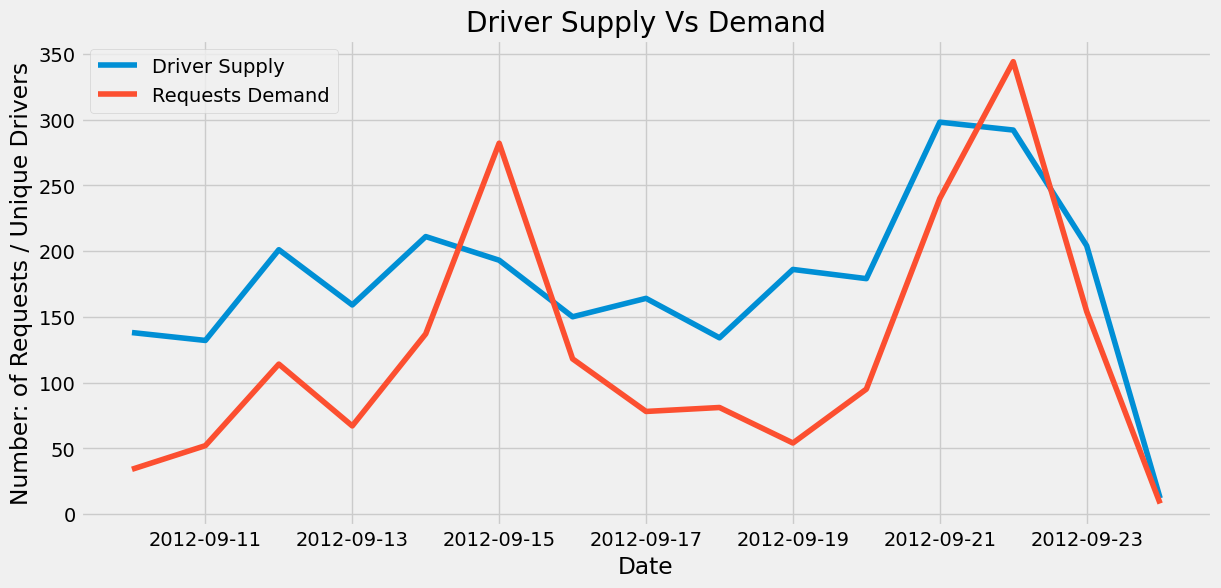

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

ax.plot(demand_supply['Date'], demand_supply['Unique Drivers'], label='Driver Supply')
ax.plot(demand_supply['Date'], demand_supply['Requests'], label='Requests Demand')

ax.set_xlabel('Date')
ax.set_ylabel('Number: of Requests / Unique Drivers')
ax.legend()
ax.set_title('Driver Supply Vs Demand')

plt.show()


**Interpreting the Data:** Based on the line chart presented above, it's evident that the increase in driver supply didn't consistently match the rise in demand. Several factors could contribute to this discrepancy. Some drivers may opt not to operate during peak demand periods, while external factors like traffic, weather conditions, or city events might affect driver availability. To confirm these observations, further analysis is required to pinpoint instances where demand surged without a corresponding increase in driver supply.

8)   If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [ ]:
# Calculate the ratio of requests to unique drivers for each hour
hourly_requests = df.groupby('Hour')['Requests'].sum()
hourly_unique_drivers = df.groupby('Hour')['Unique Drivers'].sum()
hourly_ratio_requests = hourly_requests / hourly_unique_drivers

# Find the hour with the highest ratio of request to unique drivers
highest_request_hour = hourly_ratio_requests.idxmax()
highest_request_ratio = hourly_ratio_requests.max()

print(f"At {highest_request_hour} AM, we can add 5 drivers every day during this two-week period as the ratio for requests to unique drivers is high, which is at {highest_request_ratio:.2f}")


At 2 AM, we can add 5 drivers every day during this two-week period as the ratio for requests to unique drivers is high, which is at 1.61


9)  True or False: There is exactly two weeks of data in this analysis

In [ ]:
# Calculate the difference between max and min dates
date_diff = df['Date'].max() - df['Date'].min()

# check if the difference equals 14
is_two_weeks = date_diff.days == 14

print(f'{is_two_weeks}, there is exactly two weeks of data in this analysis.')

True, there is exactly two weeks of data in this analysis.


10) Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [ ]:
# Calculate the sum of average completed trips and average unique drivers for each hour
hourly_demand_supply = df.groupby('Hour').agg({'Completed Trips': 'mean', 'Unique Drivers': 'mean'}).sum(axis=1)

# Find the hour with the lowest sum of average completed trips and average unique drivers
hour_lowest_demand_supply = hourly_demand_supply.idxmin()
lowest_demand_supply_value = hourly_demand_supply.min()

print(f'We can consider {hour_lowest_demand_supply} AM as the true "end day" as the supply of drivers and demand are at natural minimum with a value of {lowest_demand_supply_value:.2f}')


We can consider 4 AM as the true "end day" as the supply of drivers and demand are at natural minimum with a value of 0.79


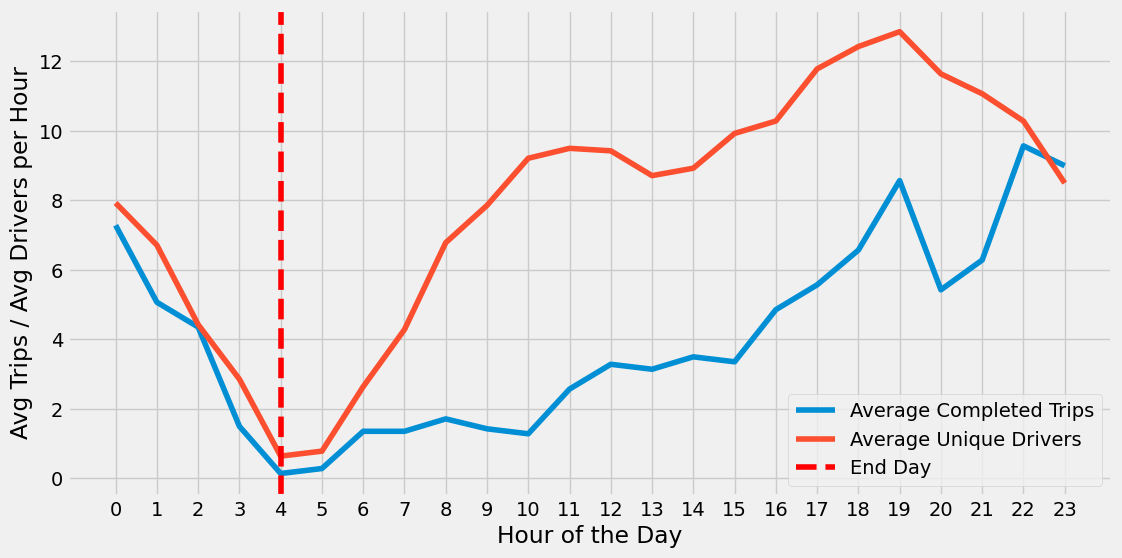

In [ ]:
# Plot a graph to show the avg completed trips and avg unique drivers for each hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Completed Trips', label='Average Completed Trips', ci=None)
sns.lineplot(data=df, x='Hour', y='Unique Drivers', label='Average Unique Drivers', ci=None)

# Mark the hour with lowest demand and supply
plt.axvline(x=hour_lowest_demand_supply, color='red', linestyle='--', label='End Day')

plt.xlabel('Hour of the Day')
plt.ylabel("Avg Trips / Avg Drivers per Hour")
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

**Data Analysis:** Based on the line graph above, it suggests that 4 AM might be a more suitable endpoint for the "End Day" compared to midnight.